In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
import statsmodels.api as sm

In [3]:
df = pd.read_excel('D:/UCO_CourseWork/Programing for analytics/ProjectProposal/cleaned_data/Cleaned_PERM_Data_from_800.xlsx')
# df = df.iloc[:40000]
df.head()

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,REFILE,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_ADDRESS_1,EMPLOYER_CITY,EMPLOYER_STATE_PROVINCE,...,FOREIGN_WORKER_ED_INST_CITY,FOREIGN_WORKER_ED_INST_STATE_P,FOREIGN_WORKER_ED_INST_COUNTRY,FOREIGN_WORKER_ED_INST_POST_CD,FOREIGN_WORKER_REQ_EXPERIENCE,FOREIGN_WORKER_ALT_OCC_EXP,FOREIGN_WORKER_EXP_WITH_EMPL,FOREIGN_WORKER_EMPL_PAY_FOR_ED,FOREIGN_WORKER_CURR_EMPLOYED,EMPLOYER_COMPLETED_APPLICATION
0,A-22262-24149,Withdrawn,2022-10-02,2022-10-02,N,N,Westgate Shellworld Inc,7012 Muncipal Drive,Orlando,FLORIDA,...,SOMOTO,MADRIZ,NICARAGUA,600025,Y,Y,N,N,N,N
1,A-21187-12839,Certified-Expired,2022-02-03,2022-10-03,N,N,"NIKE, INC.",ONE BOWERMAN DRIVE,BEAVERTON,OREGON,...,BANGKOK,CA,THAILAND,10160,N,Y,N,N,Y,N
2,A-21327-77110,Denied,2021-11-30,2022-10-03,N,N,RIVERY TECHNOLOGIES INC,500 7TH AVENUE,NEW YORK,NEW YORK,...,BEER SHEVA,NEGEV,ISRAEL,8499000,Y,Y,N,N,Y,N
3,A-21342-83195,Certified-Expired,2022-02-03,2022-10-03,N,N,ESRI INC.,380 NEW YORK ST.,REDLANDS,CALIFORNIA,...,TORONTO,ONTARIO,CANADA,M5B 2K3,N,Y,N,N,Y,N
4,A-21349-86725,Certified-Expired,2022-02-03,2022-10-03,N,N,INGURAN LLC DBA STGENETICS,22575 STATE HWY 6 SOUTH,NAVASOTA,TEXAS,...,BIRMINGHAM,CA,UNITED KINGDOM,B15 2TT,Y,Y,N,N,Y,N


In [4]:
df.shape

(850, 77)

In [5]:
# dtypes of df
df.dtypes

CASE_NUMBER                               object
CASE_STATUS                               object
RECEIVED_DATE                     datetime64[ns]
DECISION_DATE                     datetime64[ns]
REFILE                                    object
                                       ...      
FOREIGN_WORKER_ALT_OCC_EXP                object
FOREIGN_WORKER_EXP_WITH_EMPL              object
FOREIGN_WORKER_EMPL_PAY_FOR_ED            object
FOREIGN_WORKER_CURR_EMPLOYED              object
EMPLOYER_COMPLETED_APPLICATION            object
Length: 77, dtype: object

## Visualizations


## 1. Bar Chart: Distribution of Case Statuses

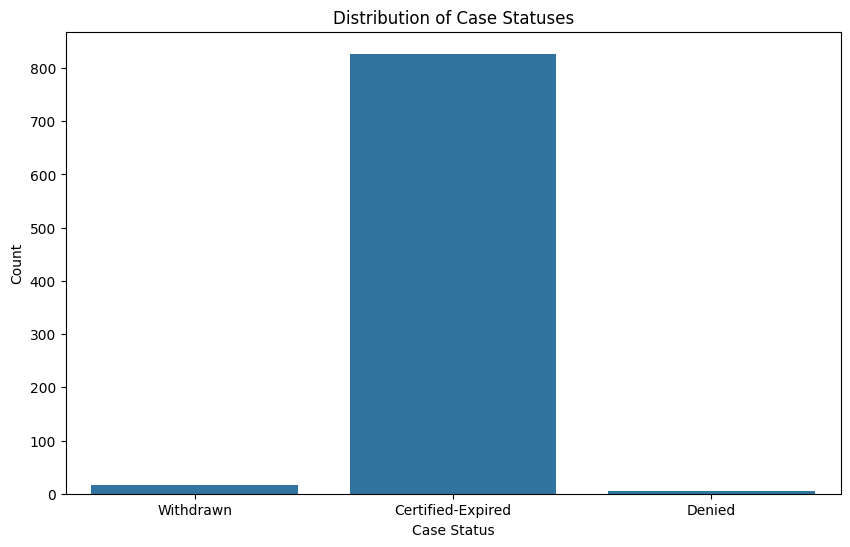

In [6]:
# Plotting the distribution of case statuses
plt.figure(figsize=(10, 6))
sns.countplot(x='CASE_STATUS', data=df)
plt.title('Distribution of Case Statuses')
plt.xlabel('Case Status')
plt.ylabel('Count')
plt.show()


## 2. Histogram: Distribution of Number of Employees Across Employers

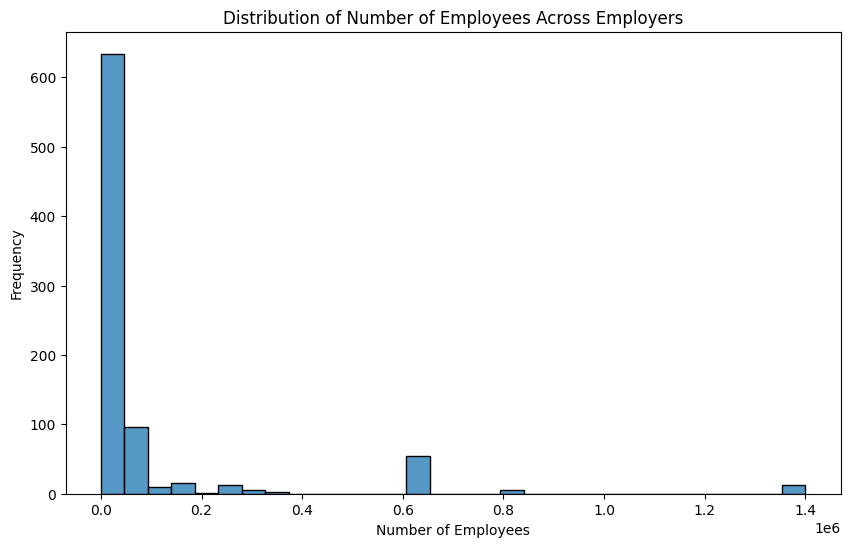

In [7]:
# Histogram of the number of employees
plt.figure(figsize=(10, 6))
sns.histplot(df['EMPLOYER_NUM_EMPLOYEES'], bins=30, kde=False)
plt.title('Distribution of Number of Employees Across Employers')
plt.xlabel('Number of Employees')
plt.ylabel('Frequency')
plt.show()


## 3. Line Plot: Trends Over Time in the Number of Applications Received Each Month

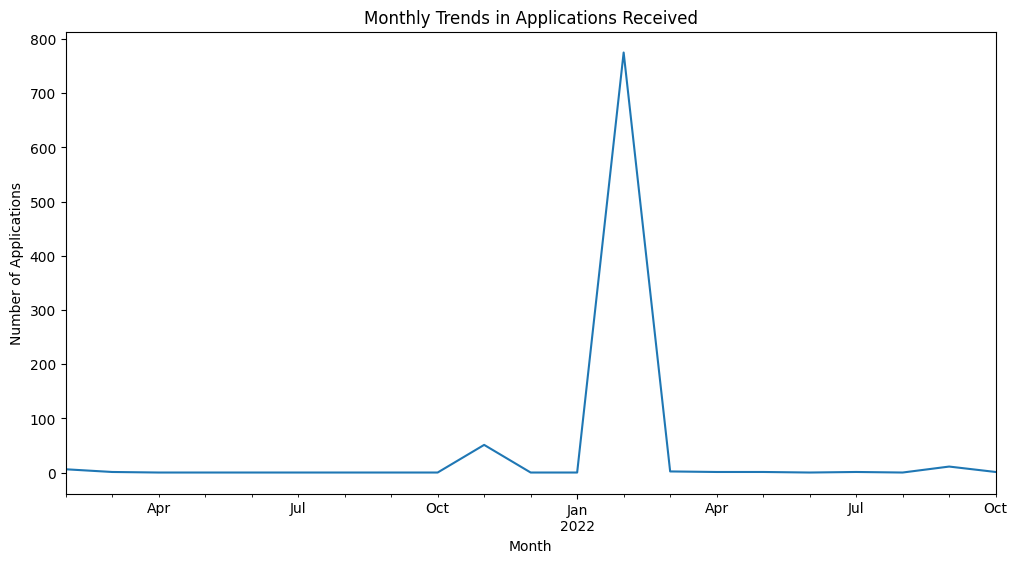

In [8]:
# Create a monthly trend
monthly_trends = df.resample('M', on='RECEIVED_DATE').size()

plt.figure(figsize=(12, 6))
monthly_trends.plot(kind='line')
plt.title('Monthly Trends in Applications Received')
plt.xlabel('Month')
plt.ylabel('Number of Applications')
plt.show()


## 4. Box Plot: Distribution of Offered Wages Across Different Job Titles

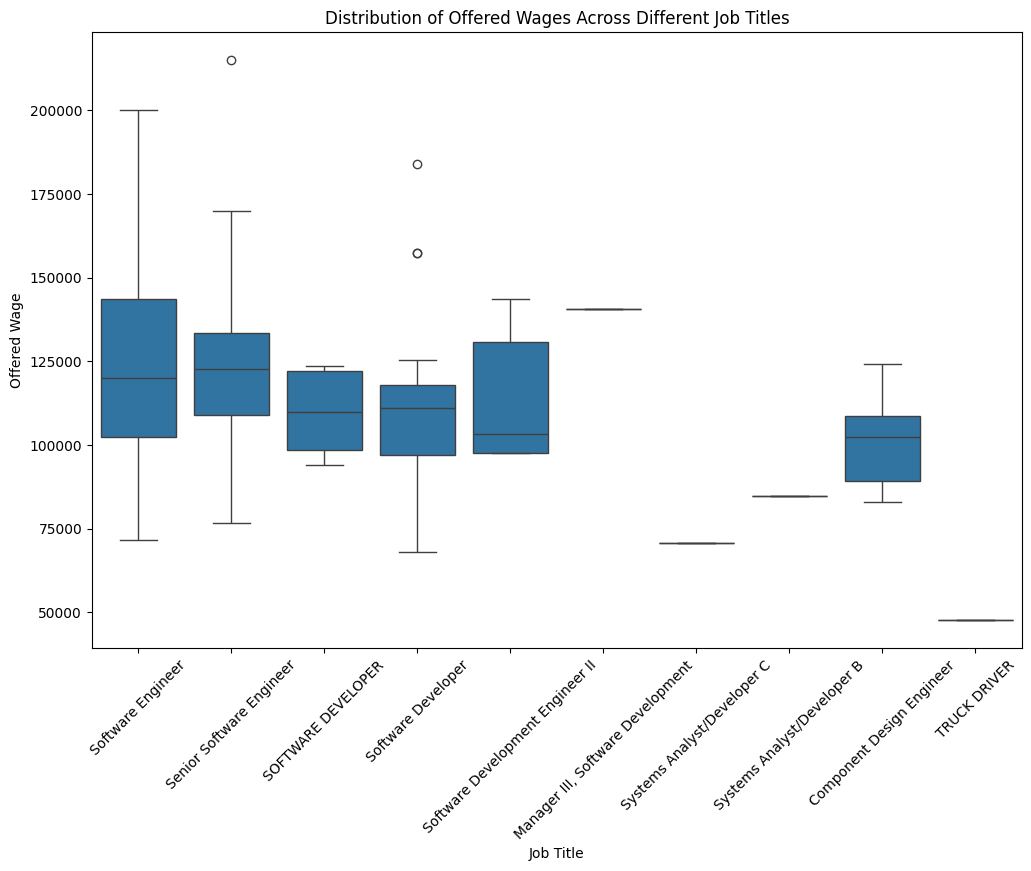

In [9]:
# Filtering to top 10 most common job titles for clarity in visualization
top_job_titles = df['JOB_TITLE'].value_counts().nlargest(10).index
filtered_df = df[df['JOB_TITLE'].isin(top_job_titles)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='JOB_TITLE', y='WAGE_OFFER_FROM', data=filtered_df)
plt.title('Distribution of Offered Wages Across Different Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Offered Wage')
plt.xticks(rotation=45)
plt.show()


## 5. Heatmap: Correlation Between Numeric Features

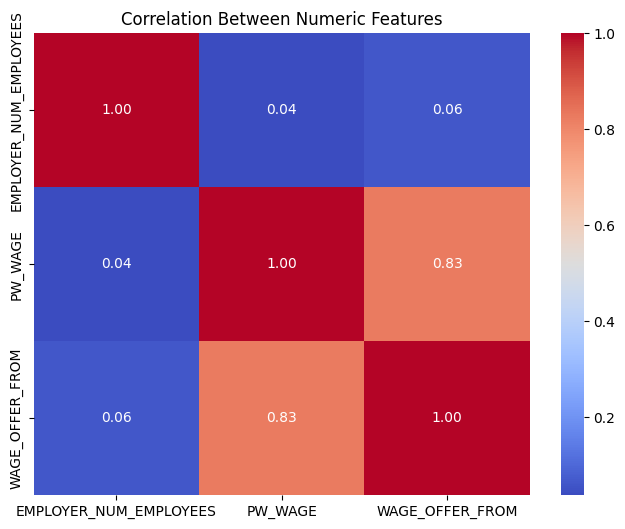

In [10]:
# Selecting numeric features
numeric_features = df[['EMPLOYER_NUM_EMPLOYEES', 'PW_WAGE', 'WAGE_OFFER_FROM']]

# Calculating correlation matrix
correlation_matrix = numeric_features.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numeric Features')
plt.show()


## 6. Violin Plot: Distributions of Offered Wages Across Different Industries (NAICS Codes)

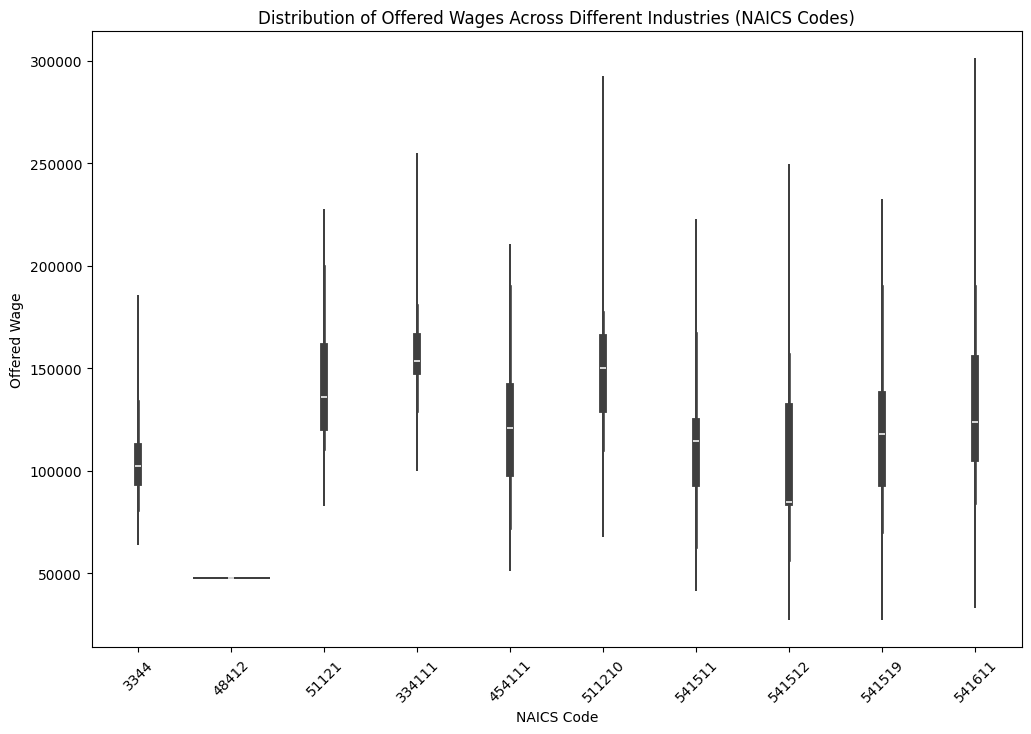

In [11]:
# Filtering to top 10 most common NAICS codes for clarity in visualization
top_naics_codes = df['NAICS_CODE'].value_counts().nlargest(10).index
filtered_df = df[df['NAICS_CODE'].isin(top_naics_codes)]

plt.figure(figsize=(12, 8))
sns.violinplot(x='NAICS_CODE', y='WAGE_OFFER_FROM', data=filtered_df)
plt.title('Distribution of Offered Wages Across Different Industries (NAICS Codes)')
plt.xlabel('NAICS Code')
plt.ylabel('Offered Wage')
plt.xticks(rotation=45)
plt.show()


## 7. Count Plot: Number of Applications by State and Case Status

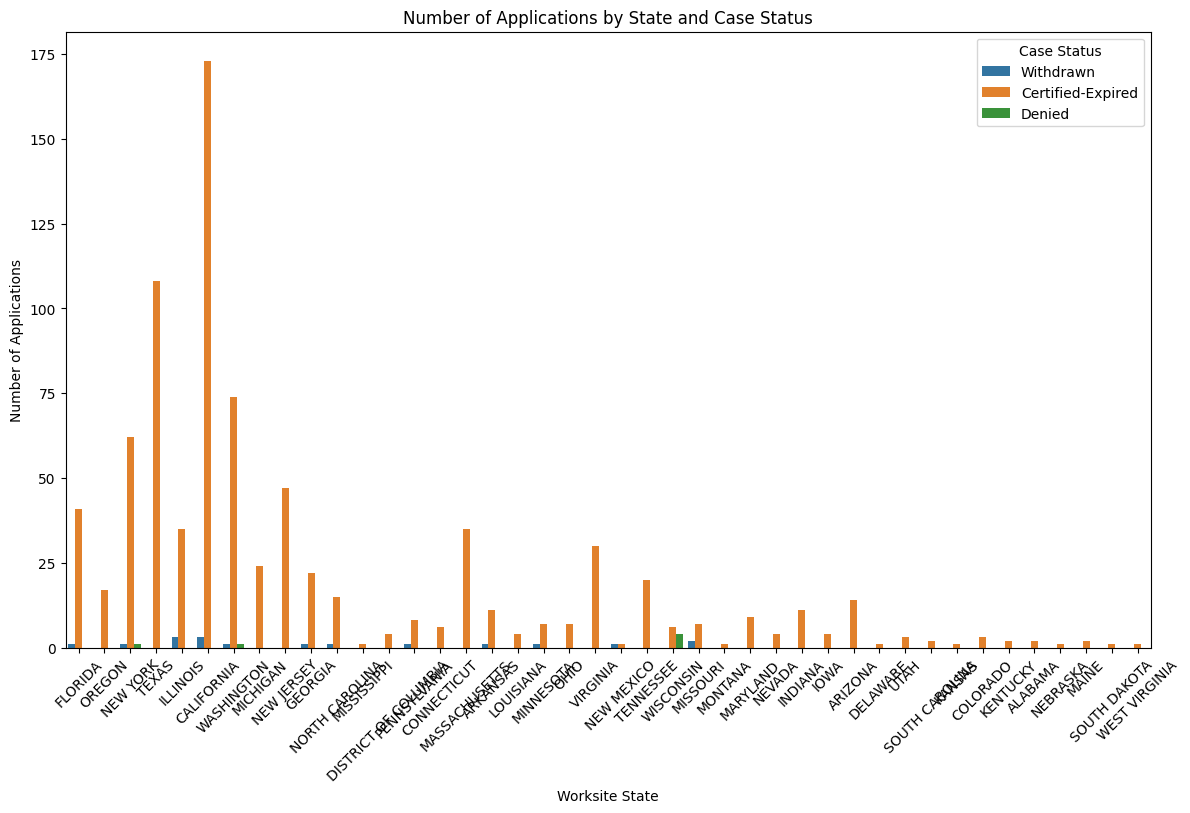

In [12]:
plt.figure(figsize=(14, 8))
sns.countplot(x='WORKSITE_STATE', hue='CASE_STATUS', data=df)
plt.title('Number of Applications by State and Case Status')
plt.xlabel('Worksite State')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45)
plt.legend(title='Case Status')
plt.show()


## 8. Scatter Plot: Relationship Between Employer Number of Employees and Prevailing Wage

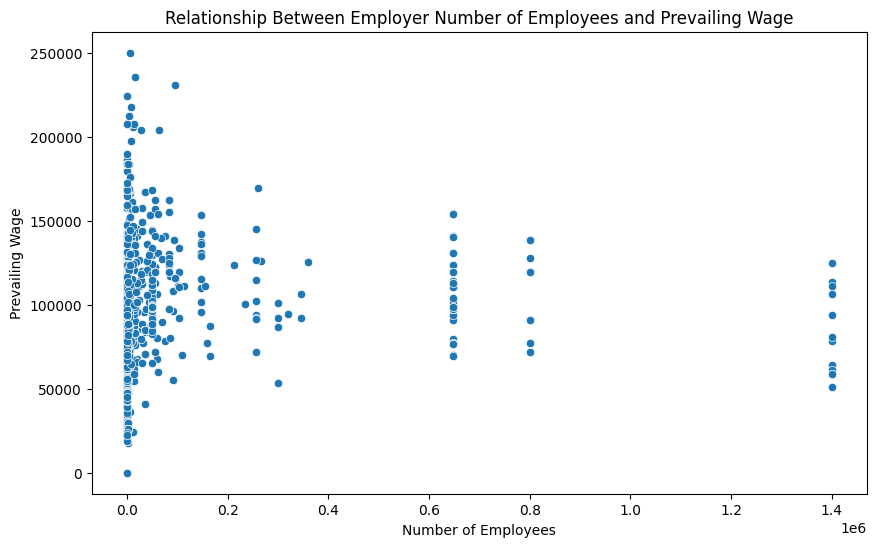

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='EMPLOYER_NUM_EMPLOYEES', y='PW_WAGE', data=df)
plt.title('Relationship Between Employer Number of Employees and Prevailing Wage')
plt.xlabel('Number of Employees')
plt.ylabel('Prevailing Wage')
plt.show()


## 9. Pair Plot: Visualizing Relationships and Distributions of Numeric Variables

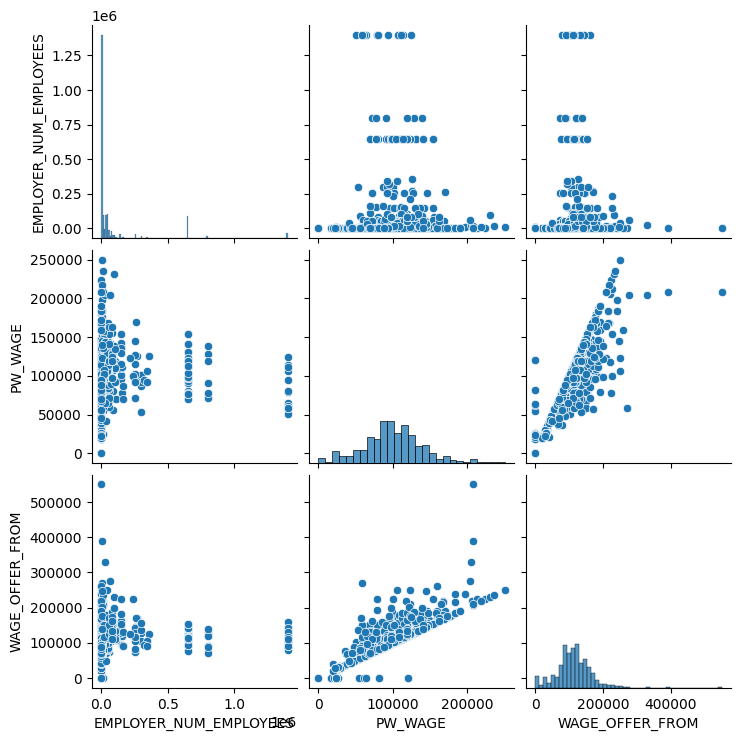

In [15]:
# Selecting a few numeric columns for the pair plot to keep the plot clear and readable
selected_columns = df[['EMPLOYER_NUM_EMPLOYEES', 'PW_WAGE', 'WAGE_OFFER_FROM']]
sns.pairplot(selected_columns)
plt.show()


## 11. Stacked Bar Chart: Number of Cases by Minimum Education Required and Case Status

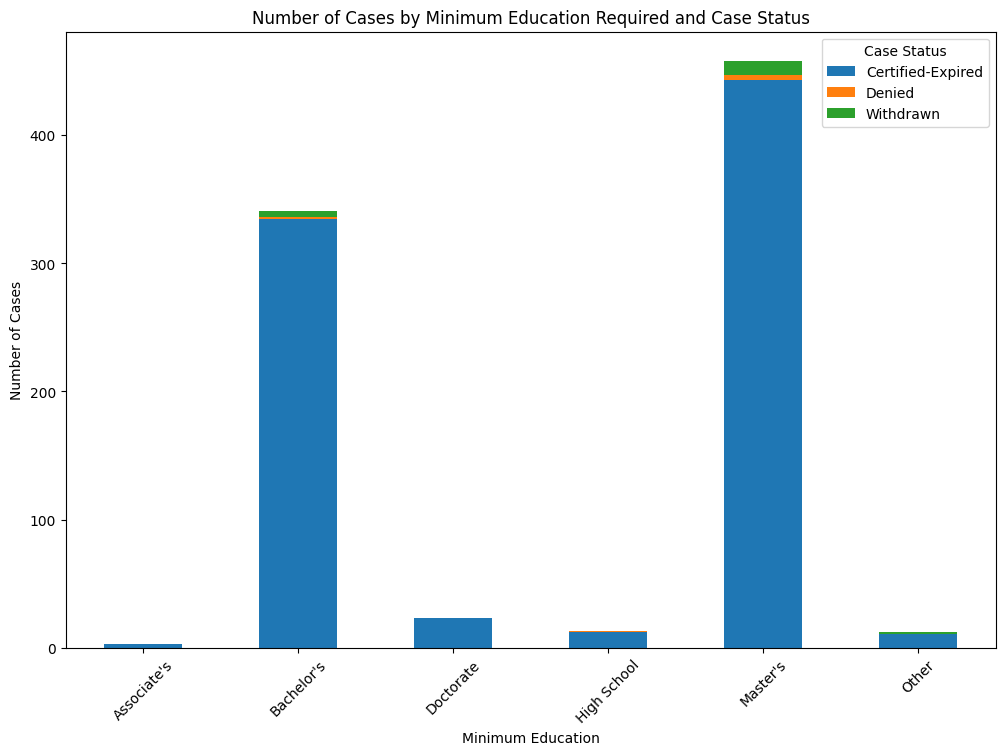

In [17]:
education_status = df.groupby(['MINIMUM_EDUCATION', 'CASE_STATUS']).size().unstack().fillna(0)
education_status.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Number of Cases by Minimum Education Required and Case Status')
plt.xlabel('Minimum Education')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend(title='Case Status')
plt.show()


## 13. Scatter Plot: Relationship Between Decision Time and Prevailing Wage

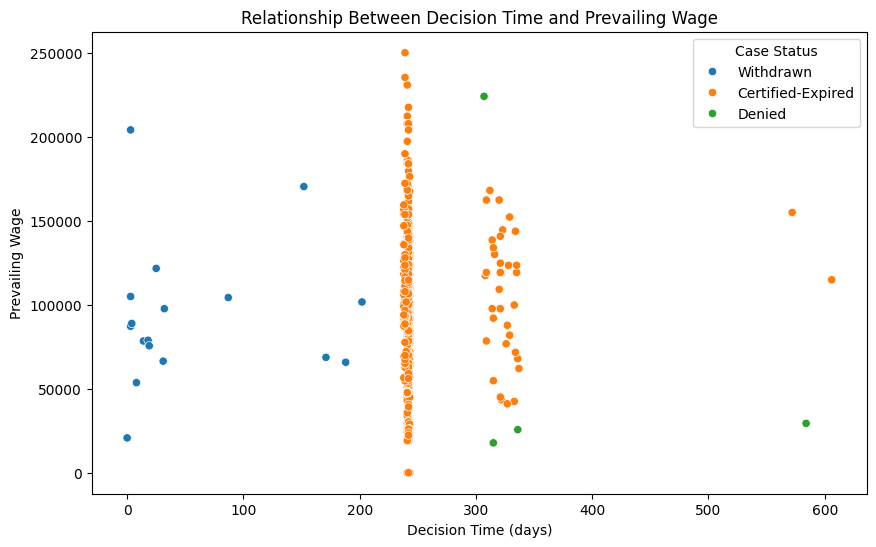

In [20]:
# Calculating the decision time
df['DECISION_TIME'] = (df['DECISION_DATE'] - df['RECEIVED_DATE']).dt.days

plt.figure(figsize=(10, 6))
sns.scatterplot(x='DECISION_TIME', y='PW_WAGE', data=df, hue='CASE_STATUS')
plt.title('Relationship Between Decision Time and Prevailing Wage')
plt.xlabel('Decision Time (days)')
plt.ylabel('Prevailing Wage')
plt.legend(title='Case Status')
plt.show()


## 14. Bar Chart: Frequency of Different Job Titles

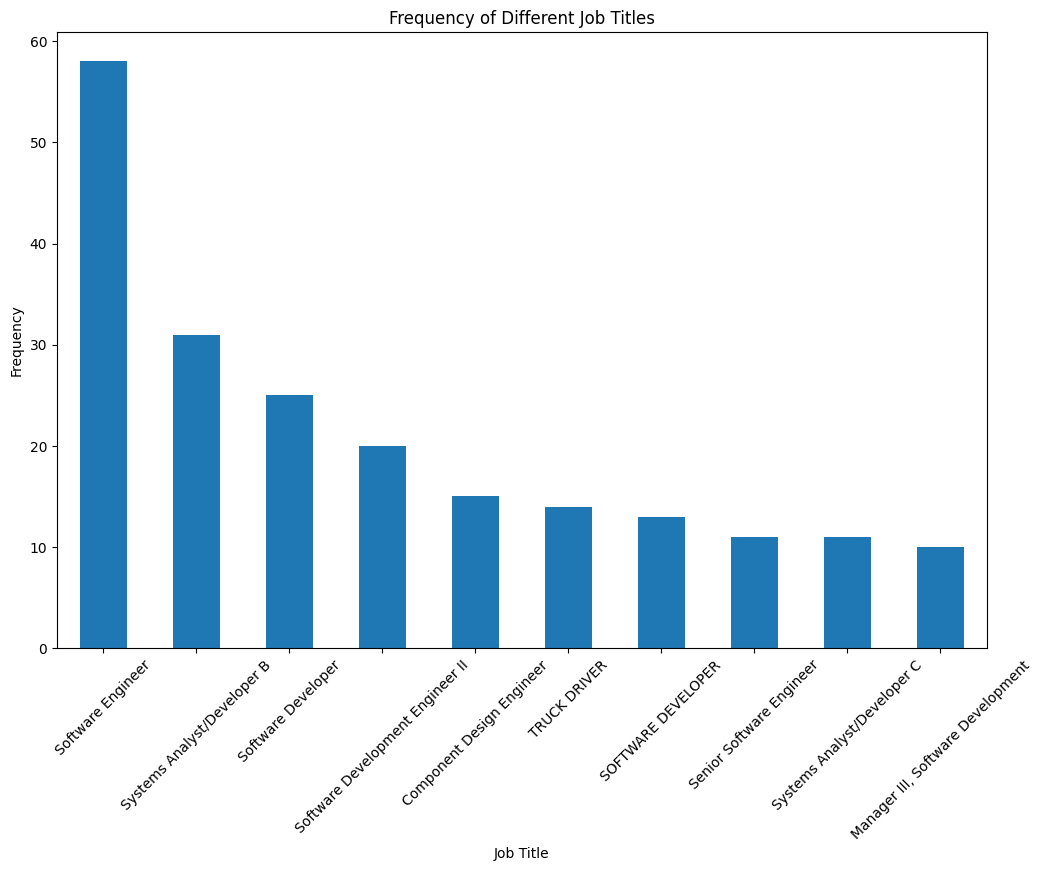

In [22]:
# Filtering to top 10 most common job titles
top_titles = df['JOB_TITLE'].value_counts().nlargest(10)
top_titles.plot(kind='bar', figsize=(12, 8))
plt.title('Frequency of Different Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


## 15. Count Plot: Distribution of Foreign Workers' Education Levels

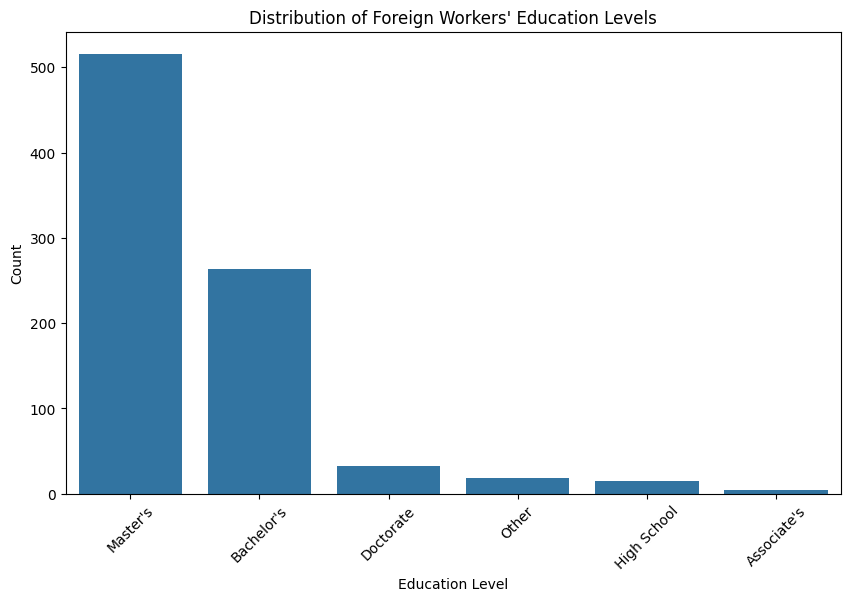

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='FOREIGN_WORKER_EDUCATION', data=df, order=df['FOREIGN_WORKER_EDUCATION'].value_counts().index)
plt.title('Distribution of Foreign Workers\' Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## 17. Swarm Plot: Distribution of Required Experience Months by Case Status

C:\Users\Rojan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 69.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Rojan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 75.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


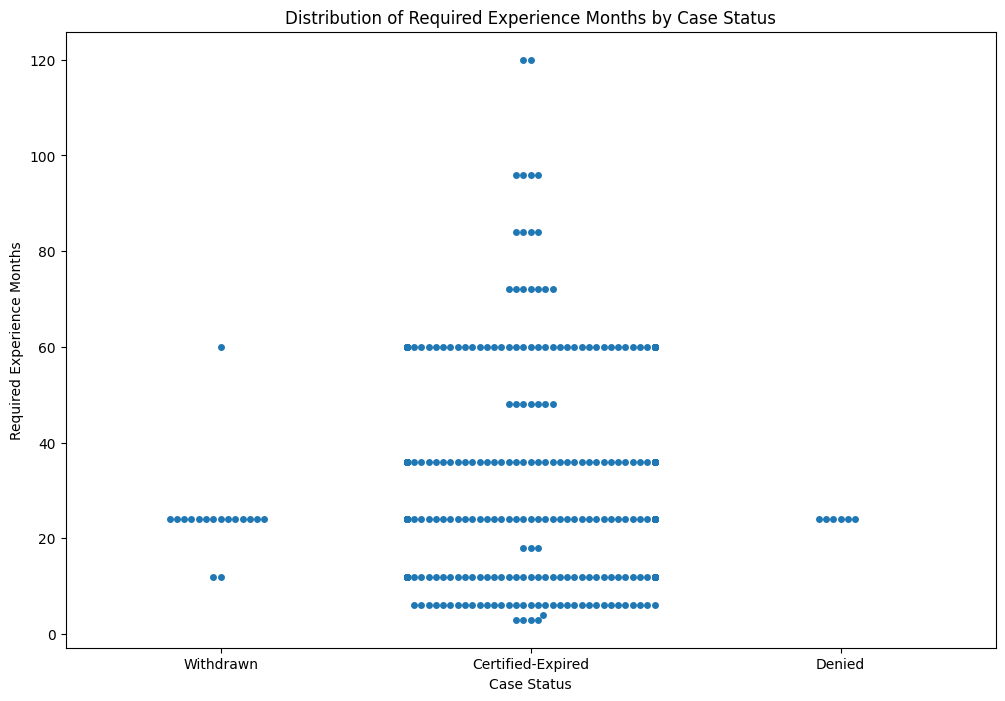

In [26]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='CASE_STATUS', y='REQUIRED_EXPERIENCE_MONTHS', data=df)
plt.title('Distribution of Required Experience Months by Case Status')
plt.xlabel('Case Status')
plt.ylabel('Required Experience Months')
plt.show()


## 18. Bar Plot: Compare the Average Offered Wage in Different States

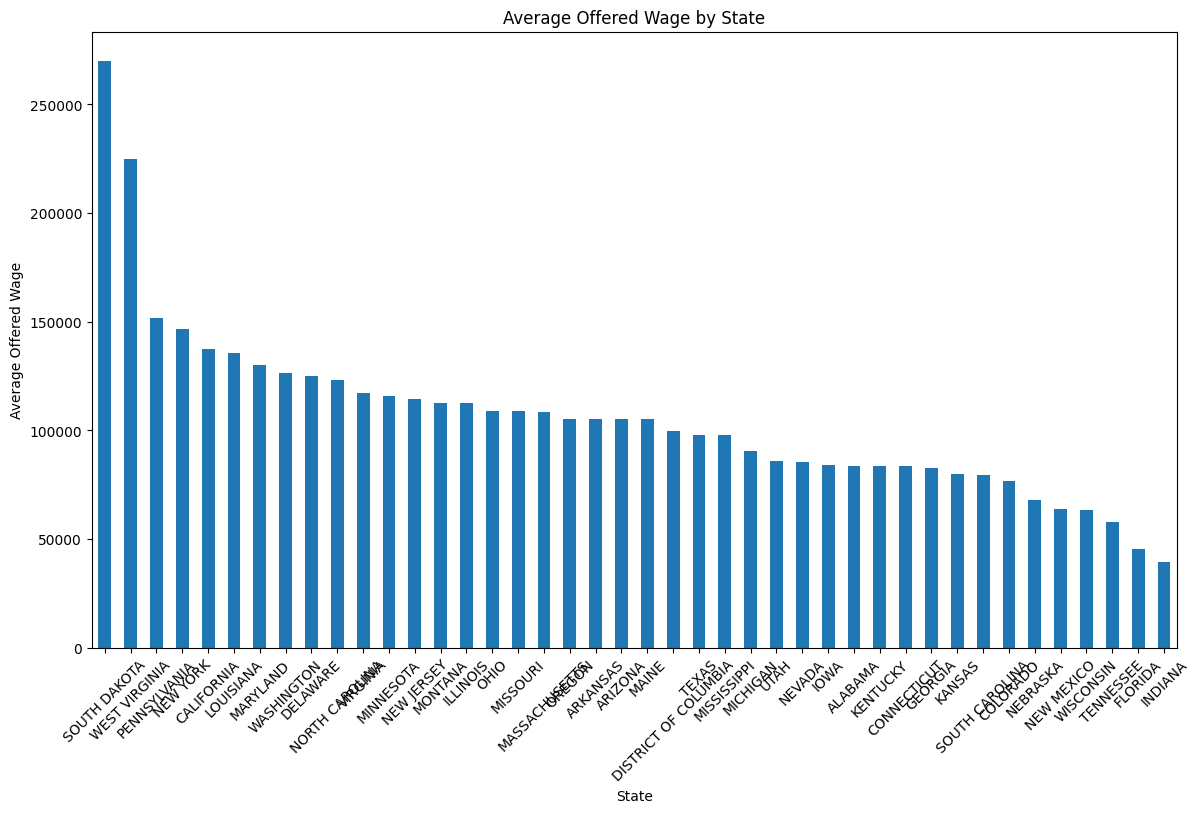

In [28]:
# Group by state and calculate average offered wage
avg_wage_by_state = df.groupby('WORKSITE_STATE')['WAGE_OFFER_FROM'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
avg_wage_by_state.plot(kind='bar')
plt.title('Average Offered Wage by State')
plt.xlabel('State')
plt.ylabel('Average Offered Wage')
plt.xticks(rotation=45)
plt.show()


## 20. KDE Plot: Distribution of Employer Year Commenced Business

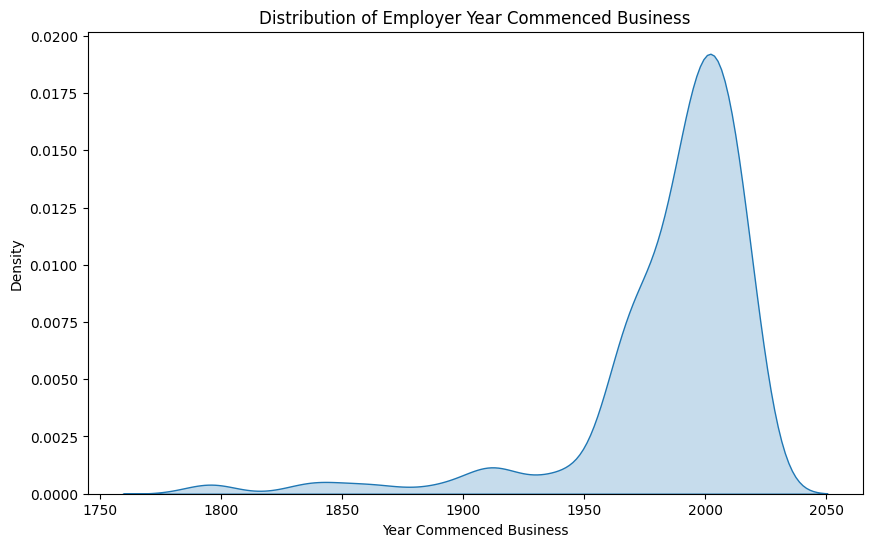

In [33]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['EMPLOYER_YEAR_COMMENCED_BUSINESS'], fill=True,)
plt.title('Distribution of Employer Year Commenced Business')
plt.xlabel('Year Commenced Business')
plt.ylabel('Density')
plt.show()


## 21: Geographical Distribution of Cases Across the United States Using a Horizontal Bar Chart

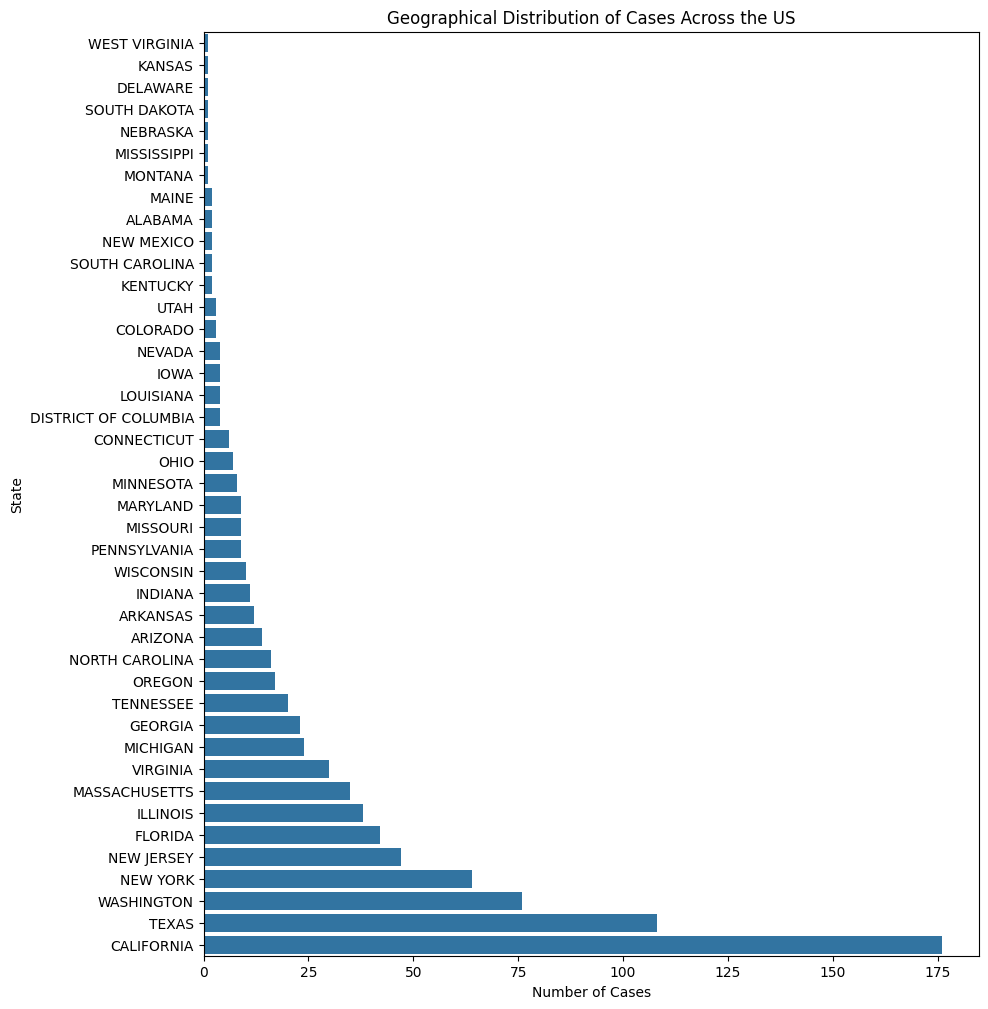

In [37]:

# Count of cases per state
state_counts = df['WORKSITE_STATE'].value_counts().reset_index()
state_counts.columns = ['state', 'count']

# Sorting the data to make the plot more readable
state_counts_sorted = state_counts.sort_values(by='count', ascending=True)

plt.figure(figsize=(10, 12))
sns.barplot(x='count', y='state', data=state_counts_sorted)
plt.title('Geographical Distribution of Cases Across the US')
plt.xlabel('Number of Cases')
plt.ylabel('State')
plt.show()

## 22. Bar Chart: Case Status Distribution for the Top 10 Industries

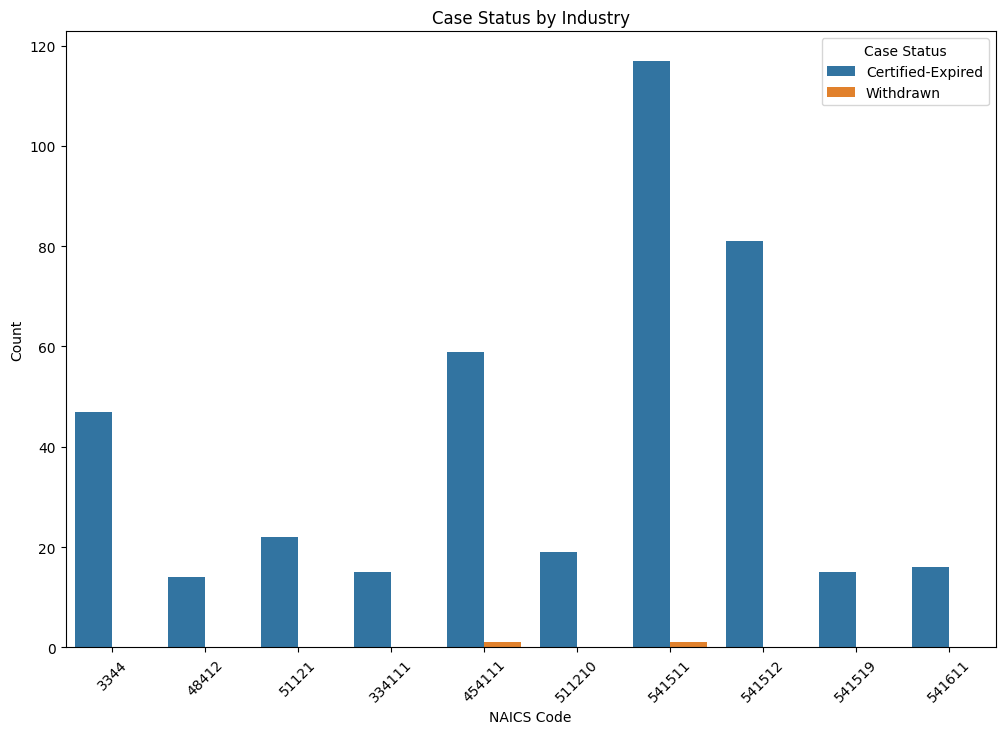

In [38]:
top_industries = df['NAICS_CODE'].value_counts().nlargest(10).index
filtered_df = df[df['NAICS_CODE'].isin(top_industries)]

# Plot
plt.figure(figsize=(12, 8))
sns.countplot(x='NAICS_CODE', hue='CASE_STATUS', data=filtered_df)
plt.title('Case Status by Industry')
plt.xlabel('NAICS Code')
plt.ylabel('Count')
plt.legend(title='Case Status')
plt.xticks(rotation=45)
plt.show()


## 23. Line Plot: Trend in Number of Applications Over Time

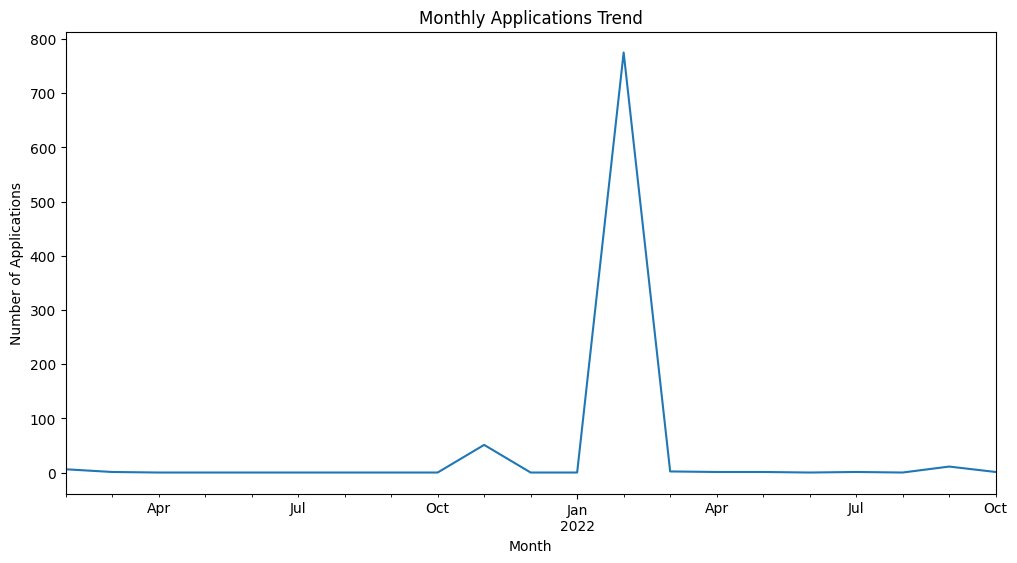

In [39]:
# Ensure RECEIVED_DATE is a datetime type
df['RECEIVED_DATE'] = pd.to_datetime(df['RECEIVED_DATE'])

# Group by month
monthly_applications = df.resample('M', on='RECEIVED_DATE').size()

plt.figure(figsize=(12, 6))
monthly_applications.plot()
plt.title('Monthly Applications Trend')
plt.xlabel('Month')
plt.ylabel('Number of Applications')
plt.show()


## 28. Pie Chart: Top Countries of Citizenship for Applicants

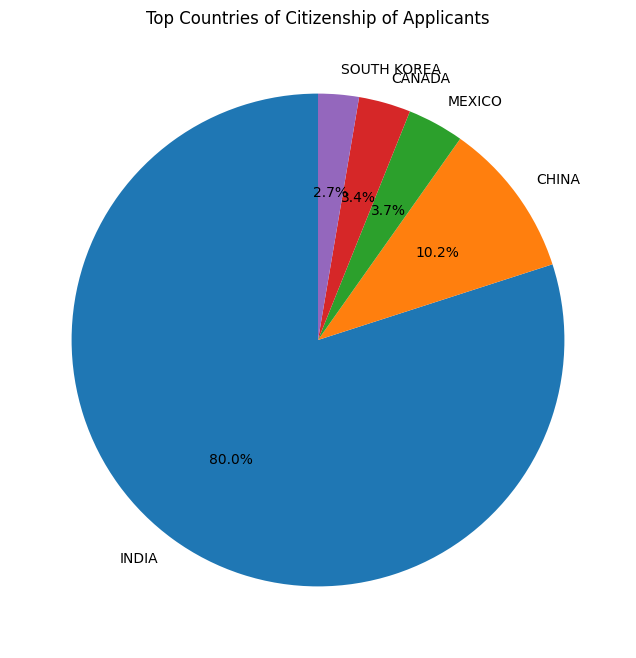

In [43]:
top_countries = df['COUNTRY_OF_CITIZENSHIP'].value_counts().nlargest(5)
plt.figure(figsize=(8, 8))
top_countries.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Top Countries of Citizenship of Applicants')
plt.ylabel('')  # Hiding the y-label as it is unnecessary for pie charts
plt.show()


## 29. Bar Chart: Job Titles and Required Experience

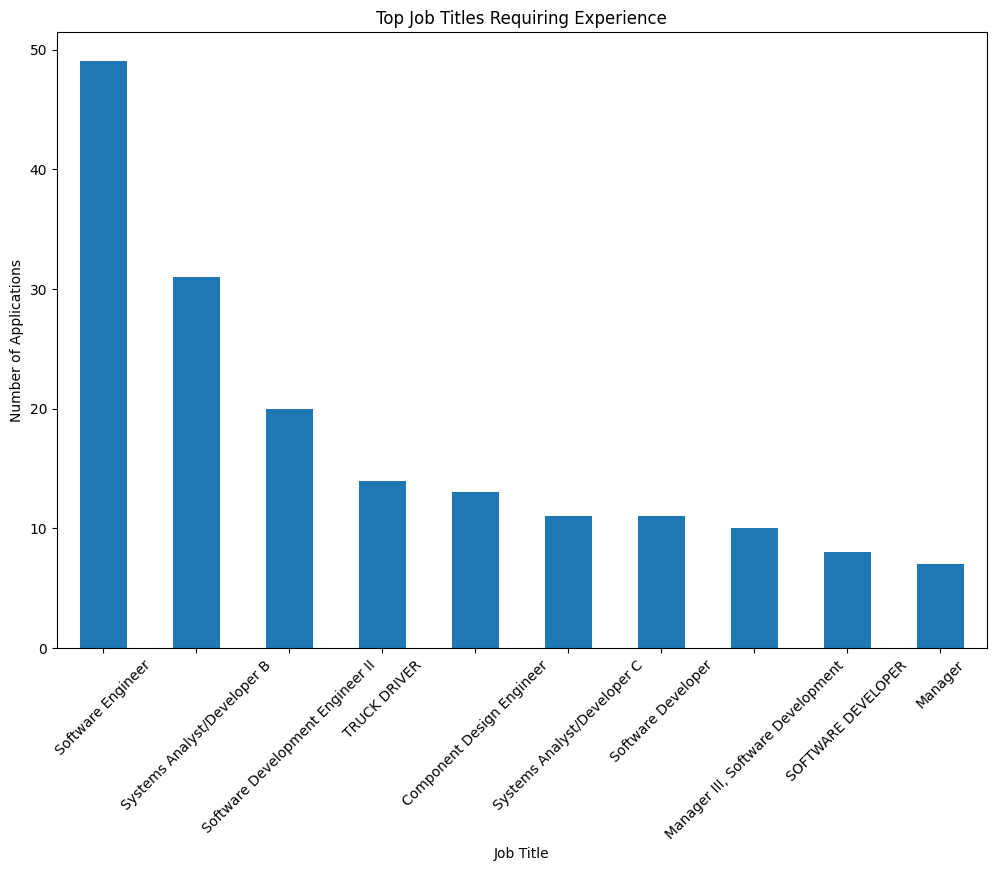

In [44]:
required_experience = df[df['REQUIRED_EXPERIENCE'] == 'Y']
job_experience_counts = required_experience['JOB_TITLE'].value_counts().nlargest(10)
job_experience_counts.plot(kind='bar', figsize=(12, 8))
plt.title('Top Job Titles Requiring Experience')
plt.xlabel('Job Title')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45)
plt.show()


----------------